In [1]:
#%load_ext nb_black

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

%matplotlib inline


# TODO: Kolommen van int omzetten naar "Int64" zodat np.NaN kan worden opgeslagen ipv 0 als placeholder

# TODO: Holoviews implementeren
# TODO: RMSE toelichten
# TODO: Scatterplot toevoegen bij Visualisation
# TODO: Lijn beter fitten bij 3D-plot

# In hoeverre is het mogelijk om de budget-omzet verhouding te voorspellen?
Ook voor deze onderzoeksvraag zullen de zeven stappen van het Data Science-proces worden toegepast. 
Stappen 1, 2 en 3 zullen in grote maten hetzelfde zijn als bij de overige twee onderzoeksvragen.
### Het Data Science-proces:
1. Data collection
2. Data processing (ook wel data munging)
3. Data cleaning
4. Data exploration & analysis
5. Model building
6. Visualization
7. Communication

***

## 1. Data Collection
Voor het beantwoorden van deze onderzoeksvraag zal alleen gebruik worden gemaakt van `movie.csv`.
Om te zien of de dataset `movie.csv` goed is ingeladen, worden de eerste vijf rijen getoond:

In [2]:
df_movies = pd.read_csv("../../data/movie.csv")
print(f"In totaal zijn er {len(df_movies)} films.\n")
df_movies.head()

In totaal zijn er 5043 films.



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Te zien is dat de data goed wordt ingelezen en de waardes in de juiste kolommen komen te staan.
Verder zijn er al NaN-waardes te zien en staan veel gegevens opgeslagen als floats.

***

## 2. Data Processing
Ook de Data Processing is grotendeels voor ons gedaan. De data is goed opgeslagen in een `.csv`-bestand
en is zojuist al ingelezen als een _Pandas_ DataFrame.

Verder rest ons nog de volgende stappen om de Data Processing te voltooien:
1. Het selecteren van de gewenste kolommen

2. Het aanpassen van onduidelijke kolomnamen
3. Het aanpassen van de datatypen

4. Het berekenen van de budget-gross verhouding van iedere film
5. Het berekenen van de Z-score-afstand tussen budget en film 
6. Het berekenen van de Z-scores van de feature-kolommen

Alvorens de gewenste kolommen kunnen worden geselecteerd, moet worden gekeken welke kolommen überhaupt relevant zijn. Pandas heeft een hele gemakkelijke functie om voor een compleet DataFrame alle correlaties uit te rekenen. De correlaties worden standaard volgens Pearsons correlatiecoëfficient berekend. Vervolgens kan het correlatiematrix gemakkelijk worden geplot met Seaborn. Seaborn maakt het mogelijk om een snel overzicht te krijgen van de correlaties.

> NB. Uiteraard is het pas bij de _Data Exploration_ van belang om de data volledig te doorgronden, echter moet tijdens de _Data Processing_ al worden gekozen welke kolommen gebruikt gaan worden. Aangezien Data Science een iteratief proces is kan tijdens een later stadium ervoor worden gekozen om meer kolommen te behouden.

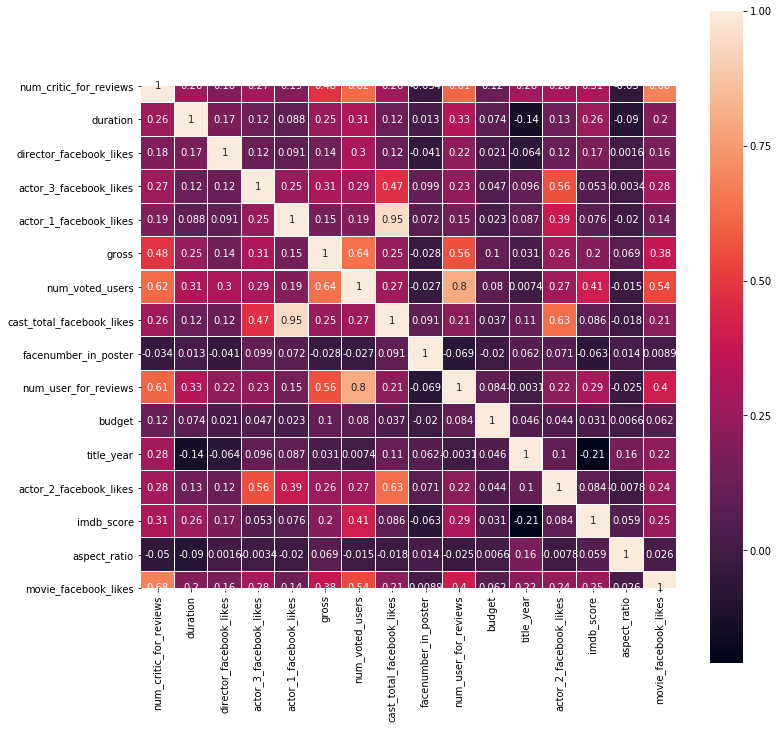

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_movies.corr(), annot=True, linewidths=.05, ax=ax, square=True)
plt.show()

Na het bestuderen van het geplotte correlatiematrix blijkt dat `num_voted_users`, `num_user_for_reviews` en `num_critic_for_reviews` de grootste correlatie hebben met `budget` en `gross`. De twee laatstgenoemden zijn uiteraard vereisten voor het beantwoorden van de onderzoeksvraag. De verhouding tussen het budget en de omzet moet immers worden voorspeld.

Verder selecteren we nog de kolom `title_year`. Dit zou eventueel later van pas kunnen komen voor het sorteren of visualiseren van de data. Zoals eerder genoemd zou het mogelijk kunnen zijn dat in een volgende iteratie blijkt dat er meer kolommen nodig zijn.

In [4]:
# Selecteren gewenste kolommen
df_movies = df_movies[["movie_title", "budget", "gross",
                       "title_year", "num_voted_users",
                       "num_user_for_reviews", "num_critic_for_reviews"]]

# Onduidelijke kolomnamen aanpassen
df_movies.rename(
    columns={
        "movie_title": "Movie title",
        "budget": "Budget",
        "gross": "Gross",
        "title_year": "Release year",
        "num_voted_users": "Number of voted users",
        "num_user_for_reviews": "Number of user reviews",
        "num_critic_for_reviews": "Number of critics"}, inplace=True,)

print(f"Kolommen:")
df_movies.columns.tolist()

Kolommen:


['Movie title',
 'Budget',
 'Gross',
 'Release year',
 'Number of voted users',
 'Number of user reviews',
 'Number of critics']

Integers zijn een stuk sneller dan floats. Het komt de efficiëntie en netheid ten goede om zo veel mogelijk kolommen naar integers
om te zetten.

NaN-types kunnen echter niet worden opgeslagen in kolommen met het datatype `int32`. Als oplossing is ervoor gekozen om alle NaN-types om te zetten naar integers. De meest logische keuze zal 0 zijn.

Het datatype `Int64` geeft wel de mogelijkheid om NaN-types samen met integers op te slaan. Echter is het `Int64`-datatype nog experimenteel en is de afweging gemaakt om dit datatype niet te gebruiken.

[Bron: Nullable integer data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html)


In [5]:
# Datatypen aanpassen: Floats naar integers omzetten
df_movies.fillna(0, inplace=True)
df_movies = df_movies.astype({"Budget": int,
                              "Gross": int,
                              "Number of voted users": int, 
                              "Number of user reviews": int,
                              "Number of critics": int})

# Datatypes aanpassen: De kolom `Release year` omzettten van float naar het datetime-datatype
df_movies["Release year"] = pd.to_datetime(df_movies["Release year"], format="%Y", errors="coerce")
df_movies.dtypes

Movie title                       object
Budget                             int32
Gross                              int32
Release year              datetime64[ns]
Number of voted users              int32
Number of user reviews             int32
Number of critics                  int32
dtype: object

Het beantwoorden van de onderzoeksvraag vraagt naar het voorspellen van de budget/omzet-verhouding.
De kolom `Budget Gross verh` bevat de mate waarin `budget` en `gross` zich verhouden. Dit werkt middels de simpele formule $\frac {Gross} {Budget}$. Een waarde groter dan `1` betekend winst. Er wordt dan meer omzet gedraaid dan dat er budget was de film. Alles onder de `1` betekend verlies. Hierbij is de omzet lager dan het budget.

`Budget Gross Zscore afst` houdt het (absolute) verschil tussen de Z-score van het budget
en de gross in. Een klein voorbeeld ter illustratie:
> - Het budget van een film heeft een Z-score van 1
> - De omzet van dezelfde film heeft een Z-score van 4
>
> De `Budget Gross Zscore afst` van deze film bedraagt $(|4-1|)=$ $3$  
> Omdat de afstand minder dan 6 is kan worden geconcludeerd dat het onderlinge verschil niet significant en de film mag blijven in de dataset.
  
Het verwijderen van waardes met een absolute Z-score afstand van meer dan 6 zal later gebeuren tijdens de _Data Cleaning_. Door deze significante waardes te verwijderen uit de dataset zullen betere voorspellingen mogelijk worden. Uitschieters kunnen de precisie van een model ernstig verslechteren.

In [6]:
# Verhouding tussen budget en gross berekenen en opslaan in nieuwe kolom
df_movies["Budget Gross verh"] = df_movies["Gross"] / df_movies["Budget"]

# Zscores berekenen van Budget en Gross.
df_movies["Budget Gross Zscore afst"] = abs(zscore(df_movies[["Budget"]]) - zscore(df_movies[["Gross"]]))

# Z-scores berekenen van de mogelijke features
df_movies["Number of voted users Zscore"] = abs(zscore(df_movies[["Number of voted users"]]))
df_movies["Number of user reviews Zscore"] = abs(zscore(df_movies[["Number of user reviews"]]))
df_movies["Number of critics Zscore"] = abs(zscore(df_movies[["Number of critics"]]))

df_movies[["Budget Gross verh", "Budget Gross Zscore afst",
           
           "Number of voted users Zscore",
           "Number of user reviews Zscore",
           "Number of critics Zscore"]].describe()

,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
count,4819.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,inf,0.502542,0.608443,0.605469,0.759896
std,NaN,1.042472,0.793676,0.795948,0.650110
min,-0.001070,0.000050,0.000781,0.000967,0.001607
25%,0.197689,0.226204,0.293719,0.261239,0.326854
50%,0.934285,0.290592,0.492167,0.478419,0.655315
75%,2.298598,0.479810,0.591209,0.655871,1.000200
max,inf,25.593967,11.598744,12.682183,5.536179


Het DataFrame `df_movies` ziet er nu als volgt uit:

In [7]:
df_movies.head()

,Movie title,Budget,Gross,Release year,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
0,Avatar,237000000,760505847,2009-01-01,886204,3054,723,3.208885,8.647773,5.795674,7.369209,4.797141
1,Pirates of the Caribbean: At World's End,300000000,309404152,2007-01-01,471220,1238,302,1.031347,0.939316,2.798784,2.559458,1.340087
2,Spectre,245000000,200074175,2015-01-01,275868,994,602,0.816629,0.091966,1.388010,1.913214,3.803546
3,The Dark Knight Rises,250000000,448130642,2012-01-01,1144337,2701,813,1.792523,3.674660,7.659834,6.434274,5.536179
4,Star Wars: Episode VII - The Force Awakens ...,0,0,NaT,8,0,0,NaN,0.259899,0.604169,0.719436,1.139796


Alle kolommen van het DataFrame hebben nu het juiste datatype.
Onder andere `Budget` en `Gross` bestaan uit integers en `Release year` bestaat uit het `datetime` datatype.
Echter zijn er nog wel 0-, NaN, en NaT-waardes zichtbaar. Deze rijen dienen tijdens de _Data
Cleaning_ nog te worden opgeschoond.


***

## 3. Data Cleaning
Nu de data in de juiste kolommen met de juiste datatypes is opgeslagen kunnen we de data gaan opschonen.
Na het uitvoeren van de volgende vijf stappen hebben we een DataFrame dat klaar voor analyse is.
1. Het verwijderen van dubbele `Movie titles`
2. Het omzetten van onrealistische waardes naar 0
3. Het verwijderen van rijen met een `Budget Gross zscore verh` van meer dan 6
4. Het verwijderen van films met een budget of gross van 0
5. Het verwijderen van NaN-types


In [8]:
print(f"In totaal zijn er {len(df_movies)} films vóór de Data Cleaning.")

# Dubbele titels verwijderen
df_movies.sort_values("Release year", inplace=True)  # Sorteren op uitgavejaar
df_movies.drop_duplicates(subset="Movie title", keep="last", inplace=True)  # Alleen meest recente versie blijft bewaard
print(f"In totaal zijn er {len(df_movies)} films zonder duplicaten over.")

# Onrealistische waardes omzetten
print(f"In totaal zijn er {df_movies[['Budget', 'Gross']].lt(0).sum().sum()} films met een negatief Budget of Gross.")
print(f"In totaal zijn er {df_movies[['Budget']].gt(400_000_000).sum().sum()} films met een budget hoger dan de duurste film ooit.")
print(f"In totaal zijn er {df_movies[['Budget', 'Gross']].gt(2_800_000_000).sum().sum()} films met een hogere omzet dan de meest succesvolle film ooit.")
print(f"In totaal zijn er {df_movies['Budget Gross Zscore afst'].gt(6).sum().sum()} films met een extreem verschil tussen budget en gross.")

# Negatieve waardes omzetten
df_movies = df_movies[(df_movies[["Budget", "Gross"]] >= 0).all(axis=1)]

# 'Te dure' films verwijderen
df_movies = df_movies[(df_movies["Budget"] < 400_000_000)]

# Verwijderen films met Z-score afstand van meer dan 6
df_movies = df_movies[(df_movies["Budget Gross Zscore afst"] <= 6)]

# Verwijderen films met budget of gross van 0
df_movies = df_movies[(df_movies[["Budget", "Gross"]] != 0).all(axis=1)]

# NaN-types verwijderen uit de titels
df_movies.dropna(inplace=True)
      

print(f"In totaal blijven er {len(df_movies)} films over.")

In totaal zijn er 5043 films vóór de Data Cleaning.
In totaal zijn er 4917 films zonder duplicaten over.
In totaal zijn er 3 films met een negatief Budget of Gross.
In totaal zijn er 7 films met een budget hoger dan de duurste film ooit.
In totaal zijn er 0 films met een hogere omzet dan de meest succesvolle film ooit.
In totaal zijn er 16 films met een extreem verschil tussen budget en gross.
In totaal blijven er 3772 films over.


Om te controleren of het DataFrame volledig is opgeschoond wordt `.describe()` aangeroepen om een beschrijving te krijgen van iedere kolom.

Twee zaken lijken ernstig onrealistisch en dienen te genieten van nader onderzoek:
- De kolom `Budget Gross verh` bevat een film die meer dan 7000x opbracht dan het budget
- De drie Z-score featurekolommen bevatten extreme outliers met Z-scores van wel meer dan 10

In [9]:
df_movies.describe(include="all")

,Movie title,Budget,Gross,Release year,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
count,3772,3.772000e+03,3.772000e+03,3772,3.772000e+03,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,3772,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Shade,NaN,NaN,2002-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1920-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.716282e+07,4.947365e+07,NaN,1.006162e+05,319.462619,160.303818,6.179414,0.496161,0.627310,0.605217,0.737539
std,NaN,4.229886e+07,6.509918e+07,NaN,1.485812e+05,398.048423,122.010985,131.467408,0.611286,0.879040,0.872412,0.700618
min,NaN,2.180000e+02,1.620000e+02,NaN,5.000000e+00,1.000000,0.000000,0.000018,0.000050,0.000781,0.001682,0.001607
25%,NaN,9.350000e+06,6.611953e+06,NaN,1.674550e+04,100.000000,71.000000,0.449913,0.194899,0.251387,0.224159,0.277585


Om erachter te komen waar deze outliers vandaan komen worden de individuele films bekeken. Alle films met een verschil van meer dan 500x worden in onderstaande tabel getoond.

Tegen de verwachtingen in blijken het `Budget` en `Gross` te kloppen. Deze films zijn daadwerkelijk realistische outliers en dienen te worden bewaard in het DataFrame. Alle drie de films hebben een eigen verhaal waarom het budget extreem laag is. Vooral The Blair Witch Project en Paranormal Activity zijn gigantisch doorgebroken en beroemde films geworden.

In [10]:
df_movies[(df_movies["Budget Gross verh"] > 500)]

,Movie title,Budget,Gross,Release year,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
4707,The Blair Witch Project,60000,140530114,1999-01-01,186786,3400,360,2342.168567,1.907012,0.744686,8.285604,1.816355
4799,Tarnation,218,592014,2003-01-01,5709,114,72,2715.660550,0.250770,0.562998,0.417503,0.548565
4793,Paranormal Activity,15000,107917283,2007-01-01,184824,1189,409,7194.485533,1.404507,0.730517,2.429679,2.218720


Ook de extreme Z-scores van onderstaande films blijken te kunnen worden verklaard en zijn correct. The Shawshank Redemption staat al jaren op nummer 1 in de IMDB-database. Hierdoor geniet de film nog steeds van veel aandacht. Nog steeds worden er veel user- of critic-reviews geschreven voor de film. De andere twee films staan tevens hoog in de ranglijst van IMDB. Ook voor deze twee vallen de extreem hoge Z-score te verklaren.

In [11]:
df_movies[(df_movies[["Number of voted users Zscore",
                      "Number of user reviews Zscore",
                      "Number of critics Zscore"]] > 10).any(axis=1)]

,Movie title,Budget,Gross,Release year,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
1937,The Shawshank Redemption,25000000,28341469,1994-01-01,1689764,4144,199,1.133659,0.120511,11.598744,10.256119,0.494299
270,The Lord of the Rings: The Fellowship of the R...,93000000,313837577,2001-01-01,1238746,5060,297,3.374598,3.473229,8.341627,12.682183,1.299029
66,The Dark Knight,185000000,533316061,2008-01-01,1676169,4667,645,2.882790,5.762814,11.500565,11.641306,4.156642


Na het valideren van het eindresultaat zit _stap 3. Data Cleaning_ er op. Het DataFrame ziet er nu als volgt uit:

In [12]:
df_movies.head()

,Movie title,Budget,Gross,Release year,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
4958,Over the Hill to the Poorhouse,100000,3000000,1920-01-01,5,1,1,30.000000,0.214816,0.604190,0.716788,1.131584
2734,Metropolis,6000000,26435,1927-01-01,111841,413,260,0.004406,0.330956,0.203456,0.374411,0.995202
4812,The Broadway Melody,379000,2808000,1929-01-01,4546,71,36,7.408971,0.221101,0.571397,0.531390,0.844181
4786,42nd Street,439000,2300000,1933-01-01,7921,97,65,5.239180,0.229651,0.547023,0.462528,0.606046
4706,Top Hat,609000,3000000,1935-01-01,13269,98,66,4.926108,0.220878,0.508402,0.459879,0.597835


Het DataFrame is nu volledig opgeschoond en klaar voor de _Data Exploration & Analysis_.

Het DataFrame bevat alleen maar nog unieke waardes voor `Movie title`.
Door het DataFrame te sorteren op `Release year` en vervolgens de laatste waarde te behouden, wordt
de meest recente uitgave van een film bewaard. Te zien is dat maar liefst 126 films dubbel
in de dataset voorkwamen.

Het omzetten van alle onrealistische waardes van `Budget` en `Gross` worden vervolgens omgezet naar `0`. Onrealistische waardes van `Budget` en `Gross` zijn onder andere negatieve waardes. Andere onrealistische waardes zijn films met een `Budget` en/of `Gross` van meer dan 2.8 miljard. Er is immers nog nooit een film* geweest die meer dan 2.8 miljard opbracht.
Verder werden alle films met een `Budget` van meer dan 400 miljoen gedropped, de duurste film ooit
kostte niet meer dan 400 miljoen. Door deze stap worden enkele extreme outliers gefilterd uit
de data wat de voorspellingen en visualisatie ten goede zal komen. 

[Bron: Lijst van succesvolste films](https://nl.wikipedia.org/wiki/Lijst_van_succesvolste_films )

Uiteindelijk worden alle films met een `Budget` of `Gross` van 0 verwijderd uit het DataFrame.

Zoals beschreven bij de _Data Processing_ zijn alle waardes met een significant verschil tussen de Z-scores van `Budget` en `Gross` verwijderd. Zie voor meer toelichting de documentatie bij _Data Processing_.

***

## 4. Data Exploration & Analysis

Na het opschonen kan begonnen worden aan de eerste verkenning. Door middel van describe krijgen we in één oogopslag een duidelijk beeld van het DataFrame:

In [13]:
df_movies.describe(include="all")

,Movie title,Budget,Gross,Release year,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
count,3772,3.772000e+03,3.772000e+03,3772,3.772000e+03,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,3772,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Shade,NaN,NaN,2002-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1920-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.716282e+07,4.947365e+07,NaN,1.006162e+05,319.462619,160.303818,6.179414,0.496161,0.627310,0.605217,0.737539
std,NaN,4.229886e+07,6.509918e+07,NaN,1.485812e+05,398.048423,122.010985,131.467408,0.611286,0.879040,0.872412,0.700618
min,NaN,2.180000e+02,1.620000e+02,NaN,5.000000e+00,1.000000,0.000000,0.000018,0.000050,0.000781,0.001682,0.001607
25%,NaN,9.350000e+06,6.611953e+06,NaN,1.674550e+04,100.000000,71.000000,0.449913,0.194899,0.251387,0.224159,0.277585


Enkele verwachtingen:
1. Het meerendeel van de films zal winst maken
2. Nieuwere films zullen relatief meer winst maken dan oudere films
3. Het budget van relatief oudere films zal lager zijn dan dat van relatief nieuwe films 

Enkele eerste observaties:
- Het DataFrame bevat nog 3772 (74.8%) van de originele 5043 rijen 
- `Movie title` bevat zoals beoogd alleen maar nog unieke waardes.
- Gemiddeld brengt een film 49 miljoen op en is er een budget van 37 miljoen. Echter heeft
 het budget een standaard deviatie van 42 miljoen en de omzet een standaard deviatie van 65 miljoen.
- Het `Release year` 2002 komt met 189x het vaakst voor
- Het DataFrame bevat films die uitgegeven zijn tussen 1920 en 2016. Een interval van bijna 100 jaar.

Het opstellen van verwachtingen en het doen van observaties kan men op ideeen brengen. Tijdens de _Data Exploration_ worden vaak de eerste interpretaties van de data gemaakt. Verwachtingen en observaties kunnen leiden tot nieuwe invalshoeken voor het bestuderen van de onderzoeksvraag.

***

In de volgende scatterplot zijn het budget en de omzet van films geplot.
Dit geeft een eerste beeld van de spreiding van de data en de relatie tussen het budget en de omzet.
Er wordt een sample van 350 (+- 10%) stuks genomen om de data beter te visualiseren en overzichtelijk te houden.

Tevens wordt de baseline getekend. Deze wordt vastgesteld op $y = x$ oftewel het break-even point.
Alles films rechts van de lijn hebben verlies geleden, allen links van de lijn maken winst. De baseline
wordt gebruikt om vast te stellen of een geproduceerd model wel echt beter presteert dan geen model of een snelle gok.

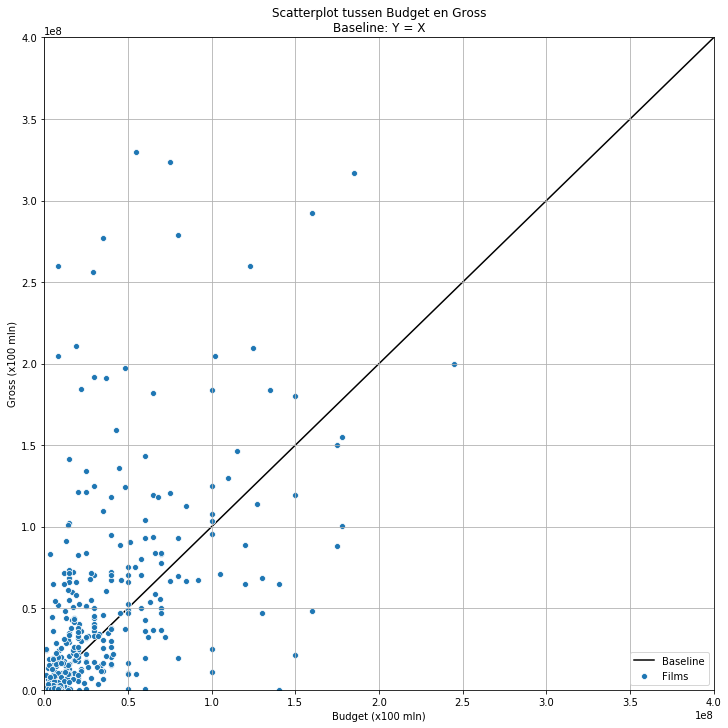

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
df_movies_sample = df_movies.sample(350, random_state=42)
line = np.linspace(0, 400_000_000)

ax.plot(line, line, zorder=0, color='black', label="Baseline")
sns.scatterplot("Budget", "Gross", data=df_movies_sample, label="Films", ax=ax)

plt.grid(True)
plt.xlim(0, 400_000_000)
plt.ylim(0, 400_000_000)
plt.xlabel("Budget (x100 mln)")
plt.ylabel("Gross (x100 mln)")
plt.legend(loc="lower right")
plt.title("Scatterplot tussen Budget en Gross"
          "\nBaseline: Y = X")
plt.show()


Een mogelijke functie om, in plaats van een selectie, alle films te analyseren is `jointplot`. Jointplots geven op een snelle manier de spreiding van punten weer. Er is goed te zien dat de meeste films onder een budget van één miljoen blijven en dat veruit de meeste films onder een omzet van twee miljoen blijven. Er valt zelfs al een kleine positieve correlatie te spotten.

Om de plot overzichtelijk te houden is gekozen om de dichtheid weer te geven. Het grote aantal films kan, zoals we hierboven al zagen, tot een onoverzichtelijke plot leiden.
[Bron: Seaborn Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

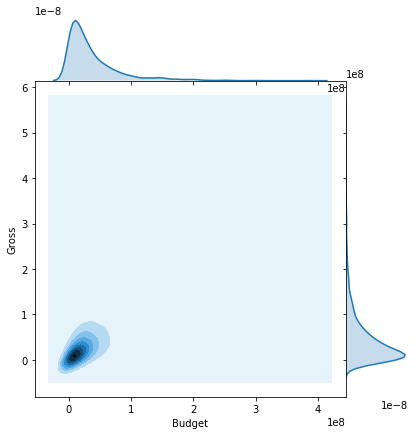

In [15]:
sns.jointplot("Budget", "Gross", data=df_movies, kind="kde", space=0)
plt.show()

In de vorige jointplot waren individuele outliers niet te zien. Boxplots zijn uitermate geschikt om deze wel weer te geven.

De omzet van films is veel verspreider dan het budget. Tevens zijn er bij de omzet veel meer extreme outliers te zien. Door het grote aantal uitschieters kunnen zelfs boxplots heel onoverzichtelijk worden. Te zien is dat het derde kwartiel van beide kolommen onder de 100 miljoen liggen. Het maximum, zijnde Q3 + 1.5 * IQR, bevindt zich op ongeveer 100 resp. 150 miljoen voor de kolommen.

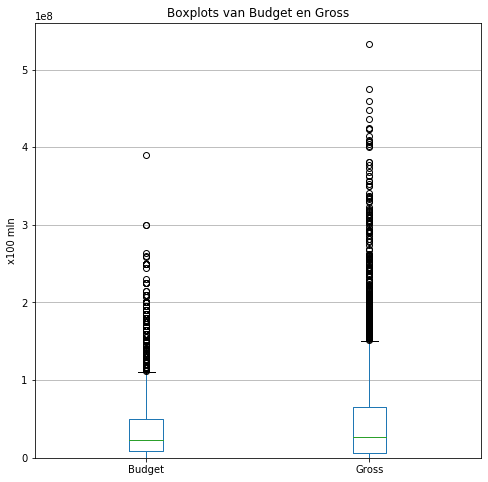

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
df_movies[["Budget", "Gross"]].boxplot(grid=False, ax=ax)
plt.ylim(bottom=0)
ax.yaxis.grid()

plt.ylabel("x100 mln")
plt.title("Boxplots van Budget en Gross")
plt.show()

Een laatste poging om ook de outliers in kaart te brengen wordt gedaan door twee
histogrammen te plotten. Bovenop de histogrammen worden streepjes getekend. Ieder streepje is een
film. De outliers zijn nu zichtbaar geworden. Direct valt te zien dat het budget
twee extreme uitschieters heeft bij 300 en resp. 400 miljoen.
Gross heeft uitschieters die door gaan tot zo'n ongeveer 550 miljoen.

Ook hier wordt weer duidelijk dat het merendeel van de films het budget onder de 100 miljoen houdt
en de opbrengst vooral onder de 200 miljoen blijft. Er zijn slechts enkele films met een extreme
verhouding tussen het budget en de omzet. `Number of critics` concentreert zich vooral van 0 tot 400.

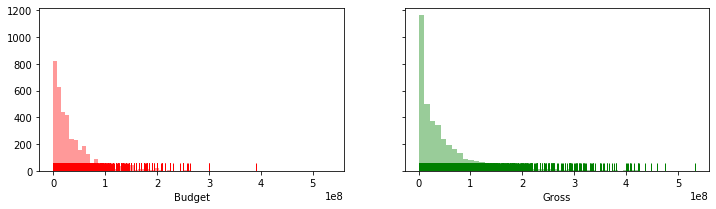

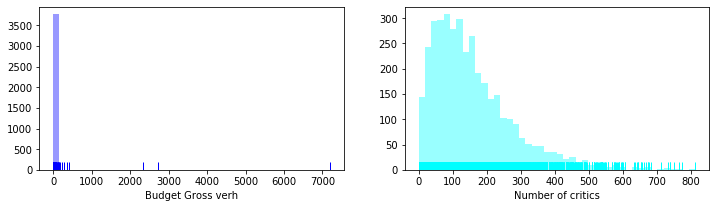

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharex="row", sharey="row")
sns.distplot(df_movies["Budget"], rug=True, kde=False, ax=axes[0], color="r")
sns.distplot(df_movies["Gross"], rug=True, kde=False, ax=axes[1], color="g")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.distplot(df_movies["Budget Gross verh"], rug=True, kde=False, ax=axes[0], color="b")
sns.distplot(df_movies["Number of critics"], rug=True, kde=False, ax=axes[1], color="cyan")
plt.show()

Pandas heeft een hele handige methode ingebouwd voor DataFrames. Deze methode berekend direct de
correlatie tussen iedere combinatie van twee variabelen. Standaard wordt de correlatie
door middel van Pearsons correlatiecoëfficiënt berekend.

Volgens Pearsons correlatiecoëfficiënt blijkt dat er een correlatie van 0.64 is tussen Budget en
Gross. Verder geven `Number of voted users`, `Number of user reviews` en `Number of critics` ook redelijke correlaties bij
`Budget` en  `Gross`. Echter willen we voor het beantwoorden van de onderzoeksvraag de correlatie tussen
de verschillende features en `Budget Gross verh` weten.

> NB. Met het bekijken van de onderlinge correlaties is een goed beeld ontstaan van de te gebruiken features. Aangezien Data Science een iteratief proces is, zijn deze features tijdens de _Data Processing_ al geselecteerd. In een later stadium kan er nog worden gekozen om meer kolommen te selecteren als features.

In [18]:
df_movies.corr()

,Budget,Gross,Number of voted users,Number of user reviews,Number of critics,Budget Gross verh,Budget Gross Zscore afst,Number of voted users Zscore,Number of user reviews Zscore,Number of critics Zscore
Budget,1.000000,0.638340,0.385584,0.397497,0.442561,-0.032408,0.423257,0.256512,0.287055,0.308920
Gross,0.638340,1.000000,0.619661,0.537264,0.459089,0.020031,0.771720,0.483925,0.418342,0.332632
Number of voted users,0.385584,0.619661,1.000000,0.782183,0.594464,0.010398,0.483122,0.908574,0.664513,0.440201
Number of user reviews,0.397497,0.537264,0.782183,1.000000,0.564169,0.069504,0.395352,0.672586,0.894301,0.383983
Number of critics,0.442561,0.459089,0.594464,0.564169,1.000000,0.033371,0.271991,0.384716,0.350147,0.725246
Budget Gross verh,-0.032408,0.020031,0.010398,0.069504,0.033371,1.000000,0.035712,0.003321,0.073301,0.036260
Budget Gross Zscore afst,0.423257,0.771720,0.483122,0.395352,0.271991,0.035712,1.000000,0.443554,0.355516,0.218633
Number of voted users Zscore,0.256512,0.483925,0.908574,0.672586,0.384716,0.003321,0.443554,1.000000,0.701251,0.410661
Number of user reviews Zscore,0.287055,0.418342,0.664513,0.894301,0.350147,0.073301,0.355516,0.701251,1.000000,0.373168
Number of critics Zscore,0.308920,0.332632,0.440201,0.383983,0.725246,0.036260,0.218633,0.410661,0.373168,1.000000


***

## 5. Model Building
Om een beeld te krijgen van de verhouding tussen het budget en de omzet bouwen we een Linear Regressie-model. Lineaire  regressie is vaak een mooi startpunt. Voor de X-as wordt het budget geselecteerd en voor de y-as de omzet. Vervolgens wordt de data gesplitst in een test- en trainset. Aangezien er redelijk veel data tot de beschikking is, wordt er getraind met een 80% / 20% verhouding.

In [19]:
X = df_movies[["Budget"]]
y = df_movies["Gross"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
print(f"Aantal trainwaarden: {len(X_train):5}")
print(f"Aantal testwaarden: {len(y_test):6}")

Aantal trainwaarden:  3017
Aantal testwaarden:    755


Vervolgens dient het model te worden aangemaakt en getraind. Zodra dit model getraind is kan de formule $Y = AX + B$ worden ingevuld. Deze formule maakt het mogelijk om ieder mogelijk budget $x$ in te vullen waarna $y$ zal resulteren in de voorspelde omzet.

In [20]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print(f"Formule van de lijn:\nY = {linReg.coef_[0]:.4f} * X + {linReg.intercept_:,.4f}")

Formule van de lijn:
Y = 0.9891 * X + 12,332,531.8598


Zodra het model is gemaakt en getraind dient het te worden gevalideerd. Belangrijke prestatieindicatoren voor Lineaire Regressie zijn de $R^2$ en de Root Mean Squared Error (RMSE).
 

In [21]:
y_pred = linReg.predict(X_test).reshape(-1, 1)
print(f"R2 score: {linReg.score(y_pred, y_test):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):,.4f}")  # Werkt

R2 score: 0.3258
Root Mean Squared Error: 51,848,292.0872


Om bovenstaand model weer te geven wordt bovenop een scatterplot de vastgestelde lineaire formule getekend. Deze lijn wordt in het rood weergegeven. In het zwart is wederom de baseline te zien.

Te zien is dat de vastgestelde formule, de y-as bij een x-waarde van 0, hoger snijdt dan de baseline. Aangezien $A$ kleiner dan 1 is, zal de lijn na verloop van tijd de baseline snijden. Uit de formule valt te concluderen dat hoe groter het budget, hoe relatief minder de winst zal worden. In het loop van de tijd neemt de budget/omzet-verhouding af. 

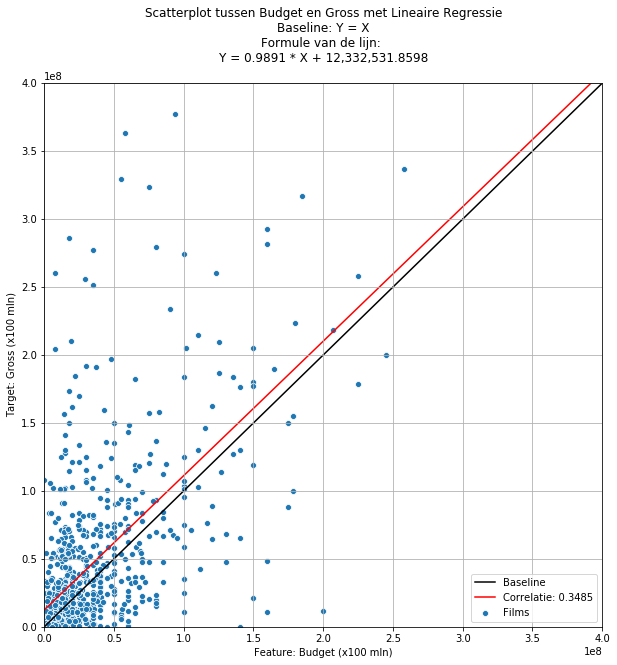

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

line = np.linspace(0, 400_000_000)
ax.plot(line, line, zorder=1, color='black', label="Baseline")

X_line = np.linspace(0, 400_000_000)
y_line = linReg.coef_ * X_line + linReg.intercept_  # y = ax+b
ax.plot(X_line, y_line, label=f"Correlatie: {linReg.score(X_test, y_test):.4f}", zorder=1, color="red")

ax = sns.scatterplot(X_test["Budget"], y_test, label="Films")

plt.grid(True)
plt.xlim(0, 400_000_000)
plt.ylim(0, 400_000_000)
plt.xlabel("Feature: Budget (x100 mln)")
plt.ylabel("Target: Gross (x100 mln)")
plt.legend(loc="lower right")
plt.title("Scatterplot tussen Budget en Gross met Lineaire Regressie\n"
          "Baseline: Y = X\n"
          "Formule van de lijn: \n"
          f"Y = {linReg.coef_[0]:.4f} * X + {linReg.intercept_:,.4f}\n")
plt.show()

### Tussentijdse evaluatie
Na het evalueren van bovenstaand model en het opnieuw bestuderen van de onderzoeksvraag zijn
we tot de conclusie gekomen dat bovenstaand model iets anders doet dan waar de onderzoeksvraag
naar vraagt. Met bovenstaand model kan, tot op zekere hoogte, de omzet worden voorspeld bij
een bepaald budget.

Waar de onderzoeksvraag echter naar vraagt is het voorspellen van de budget/omzet-verhouding.
Aan ons de taak om een goede combinatie van features te selecteren waardoor de 
budget/omzet-verhouding kan worden voorspeld. Tijdens de dataprocessing is een correlatiematrix
getoond waaruit bleek dat `Number of voted users`, `Number of user reviews` en `Number of critics`
de beste correlatie vertonen met `Budget` en/of `Gross`.

Er wordt een nieuw model opgesteld met deze set features als X. Verder wordt `Budget Gross verh`
als y genomen.

In [23]:
X = df_movies[["Number of voted users",
               "Number of user reviews",
               "Number of critics"]]
y = df_movies["Budget Gross verh"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
print(f"Aantal trainwaarden: {len(X_train):5}")
print(f"Aantal testwaarden: {len(y_test):6}")

Aantal trainwaarden:  3017
Aantal testwaarden:    755


Ook zoals bij het vorige lineaire regressiemodel wordt het getraind en zal de formule van de lijn worden berekend:

In [24]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print(f"Formule van de lijn:\nY = {linReg.coef_[0]:.4f} * X + {linReg.intercept_:.4f}")

Formule van de lijn:
Y = -0.0001 * X + 1.8212


Ten slotte worden de R2 Score en de RMSE ook voor dit model berekend. Een R2 score van 0.0048 is extreem laag. Het is met aan zekerheid grenzende waarschijnlijkheid te stellen dat het huidige model met de huidige features geen correlatie heeft met `Budget Gross verh`. De drie features hadden individueel tijdens de Data Exploration echter wel enige maat van correlatie met `budget` en/of `omzet`.

In [25]:
y_pred = linReg.predict(X_test)
print(f"R2 score: {linReg.score(X_test, y_test):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):_.4f}")

R2 score: 0.0048
Root Mean Squared Error: 261.0333


Zojuist is gebleken dat de drie features samen geen correlatie vertonen met `Budget Gross verh` ondanks dat de individuele features correlatie vertoonde met `Budget` en/of `Gross`. De volgende code gaat voor alle mogelijke subsets van de drie features hun correlatie en RMSE berekenen. Door dit proces kan de beste combinatie van de drie features worden geselecteerd.

In [26]:
X_combinaties = [["Number of voted users", "Number of user reviews", "Number of critics"],
                 
                 ["Number of voted users", "Number of user reviews"],
                 ["Number of voted users", "Number of critics"],
                 ["Number of user reviews","Number of critics"],
                 
                 ["Number of voted users"],
                 ["Number of user reviews"], 
                 ["Number of critics"]]

for features in X_combinaties:
    X = df_movies[features]
    y = df_movies["Budget Gross verh"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
    linReg.fit(X_train, y_train)
    y_pred = linReg.predict(X_test)
    
    print(f"Conbinatie: {X.columns.values}")
    print(f"R2 score: {linReg.score(X_test, y_test):23.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")

Conbinatie: ['Number of voted users' 'Number of user reviews' 'Number of critics']
R2 score:                  0.0048
Root Mean Squared Error: 261.0333

Conbinatie: ['Number of voted users' 'Number of user reviews']
R2 score:                  0.0053
Root Mean Squared Error: 260.9723

Conbinatie: ['Number of voted users' 'Number of critics']
R2 score:                 -0.0005
Root Mean Squared Error: 261.7239

Conbinatie: ['Number of user reviews' 'Number of critics']
R2 score:                  0.0014
Root Mean Squared Error: 261.4770

Conbinatie: ['Number of voted users']
R2 score:                 -0.0008
Root Mean Squared Error: 261.7646

Conbinatie: ['Number of user reviews']
R2 score:                  0.0024
Root Mean Squared Error: 261.3494

Conbinatie: ['Number of critics']
R2 score:                 -0.0005
Root Mean Squared Error: 261.7280



Te zien is dat de combinatie `Number of voted users` en `Number of user reviews` met een R2 van 0.0053 het beste presteert. Dit is een verbetering van 10% ten opzichte van het gebruiken van alle drie de features. Uiteraard is de correlatie nog steeds onbruikbaar voor enige vorm van voorspellingen.

***

## 6. Visualization
Ondanks dat tijdens de _Model Building_ gebleken is dat de resultaten met betrekking tot de R2-score zeer slecht zijn, kunnen de resultaten alsnog worden geplot. In onderstaande visualisatie zijn meerdere trendlijnen zichtbaar. Voor iedere feature wordt een trendlijn getekend. Verder is de baseline $y=x$ nog zichtbaar ter vergelijking.

De coëfficiënten van `Number of user reviews Zscore` en  `Number of critics Zscore` zijn groter dan 1. Hierdoor zal de Budget/Omzet-verhouding steeds meer toenemen naarmate één van de features toeneemt. Voor `Number of voted users Zscore` zal de verhouding en dus de winst steeds meer afnemen totdat deze de baseline kruist. Deze feature heeft namelijk een coëfficiënten lager dan 1. Zodra de baseline is gepasseerd zal er verlies worden gemaakt.

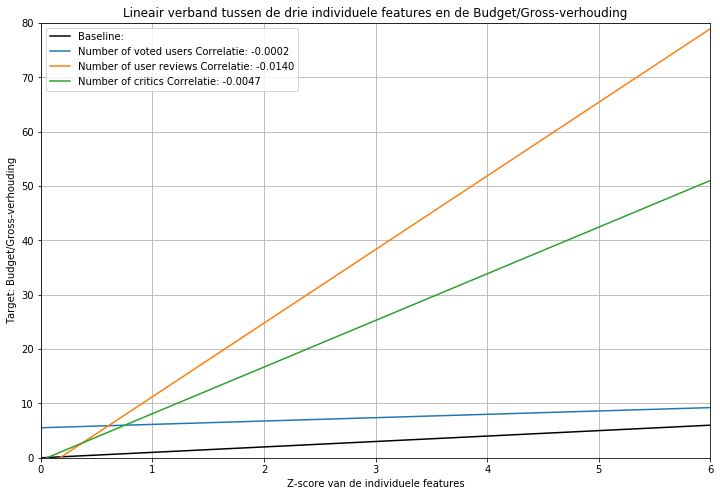

In [30]:
X_combinaties = [["Number of voted users Zscore"],
                 ["Number of user reviews Zscore"], 
                 ["Number of critics Zscore"]]

fig, ax = plt.subplots(figsize=(12,8))
line = np.linspace(0, 6, 755)
ax.plot(line, line, color='black', label=f"Baseline:")

for feature in X_combinaties:
    X = df_movies[feature]
    y = df_movies["Budget Gross verh"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=True, train_size=0.8)
    linReg.fit(X_train, y_train)
    
    X_line = np.linspace(0, 6)
    y_line = linReg.coef_ * X_line + linReg.intercept_  # y = ax+b
    
    ax.plot(X_line, y_line, label=f"{feature[0][:-7]} Correlatie: {linReg.score(X_test, y_test):.4f}")

plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 80)
plt.xlabel("Z-score van de individuele features")
plt.ylabel("Target: Budget/Gross-verhouding")
plt.title("Lineair verband tussen de drie individuele features en de Budget/Gross-verhouding")
plt.legend()
plt.show()

Waarbij in bovenstaande plot de lineaire regressielijnen van de losse features worden geplot, zijn in onderstaande plot de lineaire regressielijnen van iedere combinatie van twee features zichtbaar. Aangezien we nu met twee features en één target-waarde bezig zijn, stappen we over naar 3D-plots.

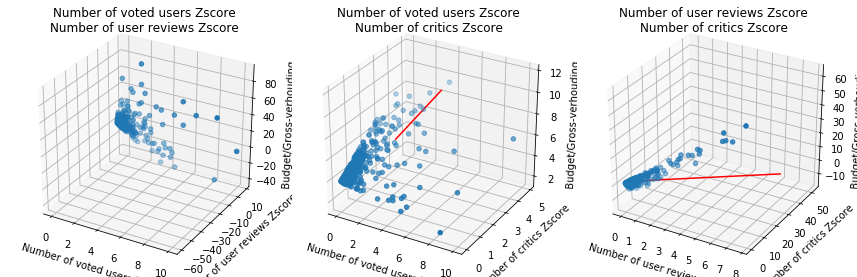

In [28]:
X_combinaties = [["Number of voted users Zscore", "Number of user reviews Zscore"],
                 ["Number of voted users Zscore", "Number of critics Zscore"],
                 ["Number of user reviews Zscore","Number of critics Zscore"]]

fig = plt.figure(figsize=plt.figaspect(0.333))
for i, features in enumerate(X_combinaties):
    X = df_movies[features]
    y = df_movies["Budget Gross verh"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
    linReg.fit(X_train, y_train)
    
    y_pred = linReg.predict(X_test)

    x_line = np.linspace(0, 6)
    y_line = linReg.coef_[0] * x_line + linReg.intercept_
    z_line = linReg.coef_[1] * x_line + linReg.intercept_
    
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    
    ax.scatter3D(X_test[features[0]], X_test[features[1]], y_pred)
    ax.plot3D(x_line, y_line, z_line, color="red")
    ax.set_title(f"{features[0]}\n{features[1]}")
    ax.set_xlabel(f"{features[0]}")
    ax.set_ylabel(f"{features[1]}")
    ax.set_zlabel("Budget/Gross-verhouding")

plt.tight_layout()
plt.show()

Helaas is het niet mogelijk om de lineaire regressielijn van drie features samen met één target weer te geven in een 4D-plot. Plotten in een 4-dimensionale ruimte is niet mogelijk. Wel kan er gekozen worden om in een 3D-plot als vierde marker te kiezen voor bijvoorbeeld de grootte, vorm of kleur van de individuele films.

Naast bovenstaande grafieken is de lineaire regressie van _Model building_ tussen het budget en de gross de meest interessante  visualisatie. In deze visualisatie zijn de individuele punten en tevens de eigenschappen van de lineaire lijn goed terug te zien. De jointplot die gemaakt is tijdens de _Data Exploration & Analysis_ geeft op een vereenvoudigde maar visueel aantrekkelijke manier de dichtheid weer.

***

## 7. Communication

Als pipelijn is deze onderzoeksvraag zijn de _7 stappen van het Data Scienceproces_ strikt gevolgd. Tijdens sommige stappen als de _Model Building_ komt de realisatie dat het project anders moet worden aangepakt. Wat volgt is het werpen van een nieuwe blik op de onderzoeksvraag en soms weer beginnen bij het whiteboard. Bij bijvoorbeeld de _Data Exploration_ bleek dat er meer kolommen nodig waren voor meer features. Aangezien Data Science een heel iteratief proces is, zijn deze kolommen bij de _Data Processing_ toegevoegd en vervolgens schoongemaakt tijdens de _Data Cleaning_.

Het documenteren en coderen van een interatief proces kan heel verwarrend worden. Om het proces duidelijk te houden is er voor deze onderzoeksvraag voor gekozen om de structuur en volgorde van de zeven stappen in stand te houden. Zoals net beschreven worden in een eerdere processtap soms al keuzes gemaakt die pas in een volgend stadium duidelijk worden.

***

Het continu valideren van de te gebruiken data is een heel belangrijk onderdeel om de kwaliteit van de te trekken conclusies te kunnen garanderen. Na de _Data Cleaning_ moet worden gekeken of de juiste data is verwijderd of juist is behouden. Verder dienen uitschieters te worden geanalyseert en gevalideerd en moet de correcte data worden geselecteerd om te visualiseren. Niet zomaar alle data kan met elkaar worden getekend in een grafiek. Dit alles zal leiden tot een verhoogde betrouwbaarheid van het eindproduct.

Het selecteren en opschonen voor _Exploration_ en _Model building_ maken van de data is de meest iteratieve stap geweest voor het beantwoorden van de derde onderzoeksvraag. Continu dient de data te worden herzien en aangepast. Continu dient er data te worden verwijderd of toegevoegd. Continu dient er te worden gekeken of de data wel relevant is en er niet onjuiste conclusies worden getrokken.

***
### Beantwoording onderzoeksvraag, conclusie en aanbeveling

De derde onderzoeksvraag ging als volgt:
> #### In hoeverre is het mogelijk om de budget/omzet verhouding te voorspellen?

Het is volgens de huidige werkwijzen, met de huidige modellen, data en features, ons niet mogelijk geweest om de budget/omzet-verhouding zodanig te voorspellen dat hier betrouwbare waardes uit kunnen komen. Tijdens het onderzoek is de R2-waarde niet boven de 0,5% gekomen. De prestaties van alle modellen zijn zeer onder de maat en niet bruikbaar voor de praktijk.

Een mogelijke oorzaak kan zijn dat er nog steeds een aantal extreme outliers in de data zitten. Deze outliers zijn bekend maar zijn bewaard gebleven omdat de waardes allemaal kloppen. De outliers waren niet foutief. Verder was het opmerkelijk dat het budget en de omzet afzonderlijk wel tot op zekere hoogte zijn te voorspellen. Wanneer de verhouding tussen het budget en de omzet is berekend, valt de geresulteerde kolom ineens niet meer te voorspellen. Een mogelijke oplossing zou zijn om het budget en de omzet individueel te voorspellen in twee aparte modellen.

Mogelijk geïnteresseerden uit de business hebben mogelijk meer belang bij het voorspellen van de omzet (gross) ten opzichte van hun investering (budget). Mede hierom zou het in de toekomst interessanter zijn om de omzet te voorspellen in plaats van de budget/omzet-verhouding.